### Setting Dynamic prices
In this project we will build a strategy to accomodate prices depending on various factors to respond market demand, customer behaviour in order to achieve positive outcomes.
For this we will use ride renting company. Usually prices are based on the fix rate per kilometers. We will instead analyze hystorical data to see factors which impact demand and adapt the prices accordingly: For example, during rush hours or some specific days in week we will increase the prices, and in periods of low demand we will motivate more lease with lower prices.    

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set(color_codes=True)

In [4]:
# dataset, describe, info, check correlation, time
df = pd.read_csv('dynamic_pricing.csv')
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_Riders,1000.0,60.372000,23.701506,20.000000,40.000000,60.000000,81.000000,100.000000
Number_of_Drivers,1000.0,27.076000,19.068346,5.000000,11.000000,22.000000,38.000000,89.000000
Number_of_Past_Rides,1000.0,50.031000,29.313774,0.000000,25.000000,51.000000,75.000000,100.000000
Average_Ratings,1000.0,4.257220,0.435781,3.500000,3.870000,4.270000,4.632500,5.000000
Expected_Ride_Duration,1000.0,99.588000,49.165450,10.000000,59.750000,102.000000,143.000000,180.000000
Historical_Cost_of_Ride,1000.0,372.502623,187.158756,25.993449,221.365202,362.019426,510.497504,836.116419


In [6]:
df.isna().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

Let us check the distribution of each numerical variable and their correlation. We will distinguish the values per customer loyalty status

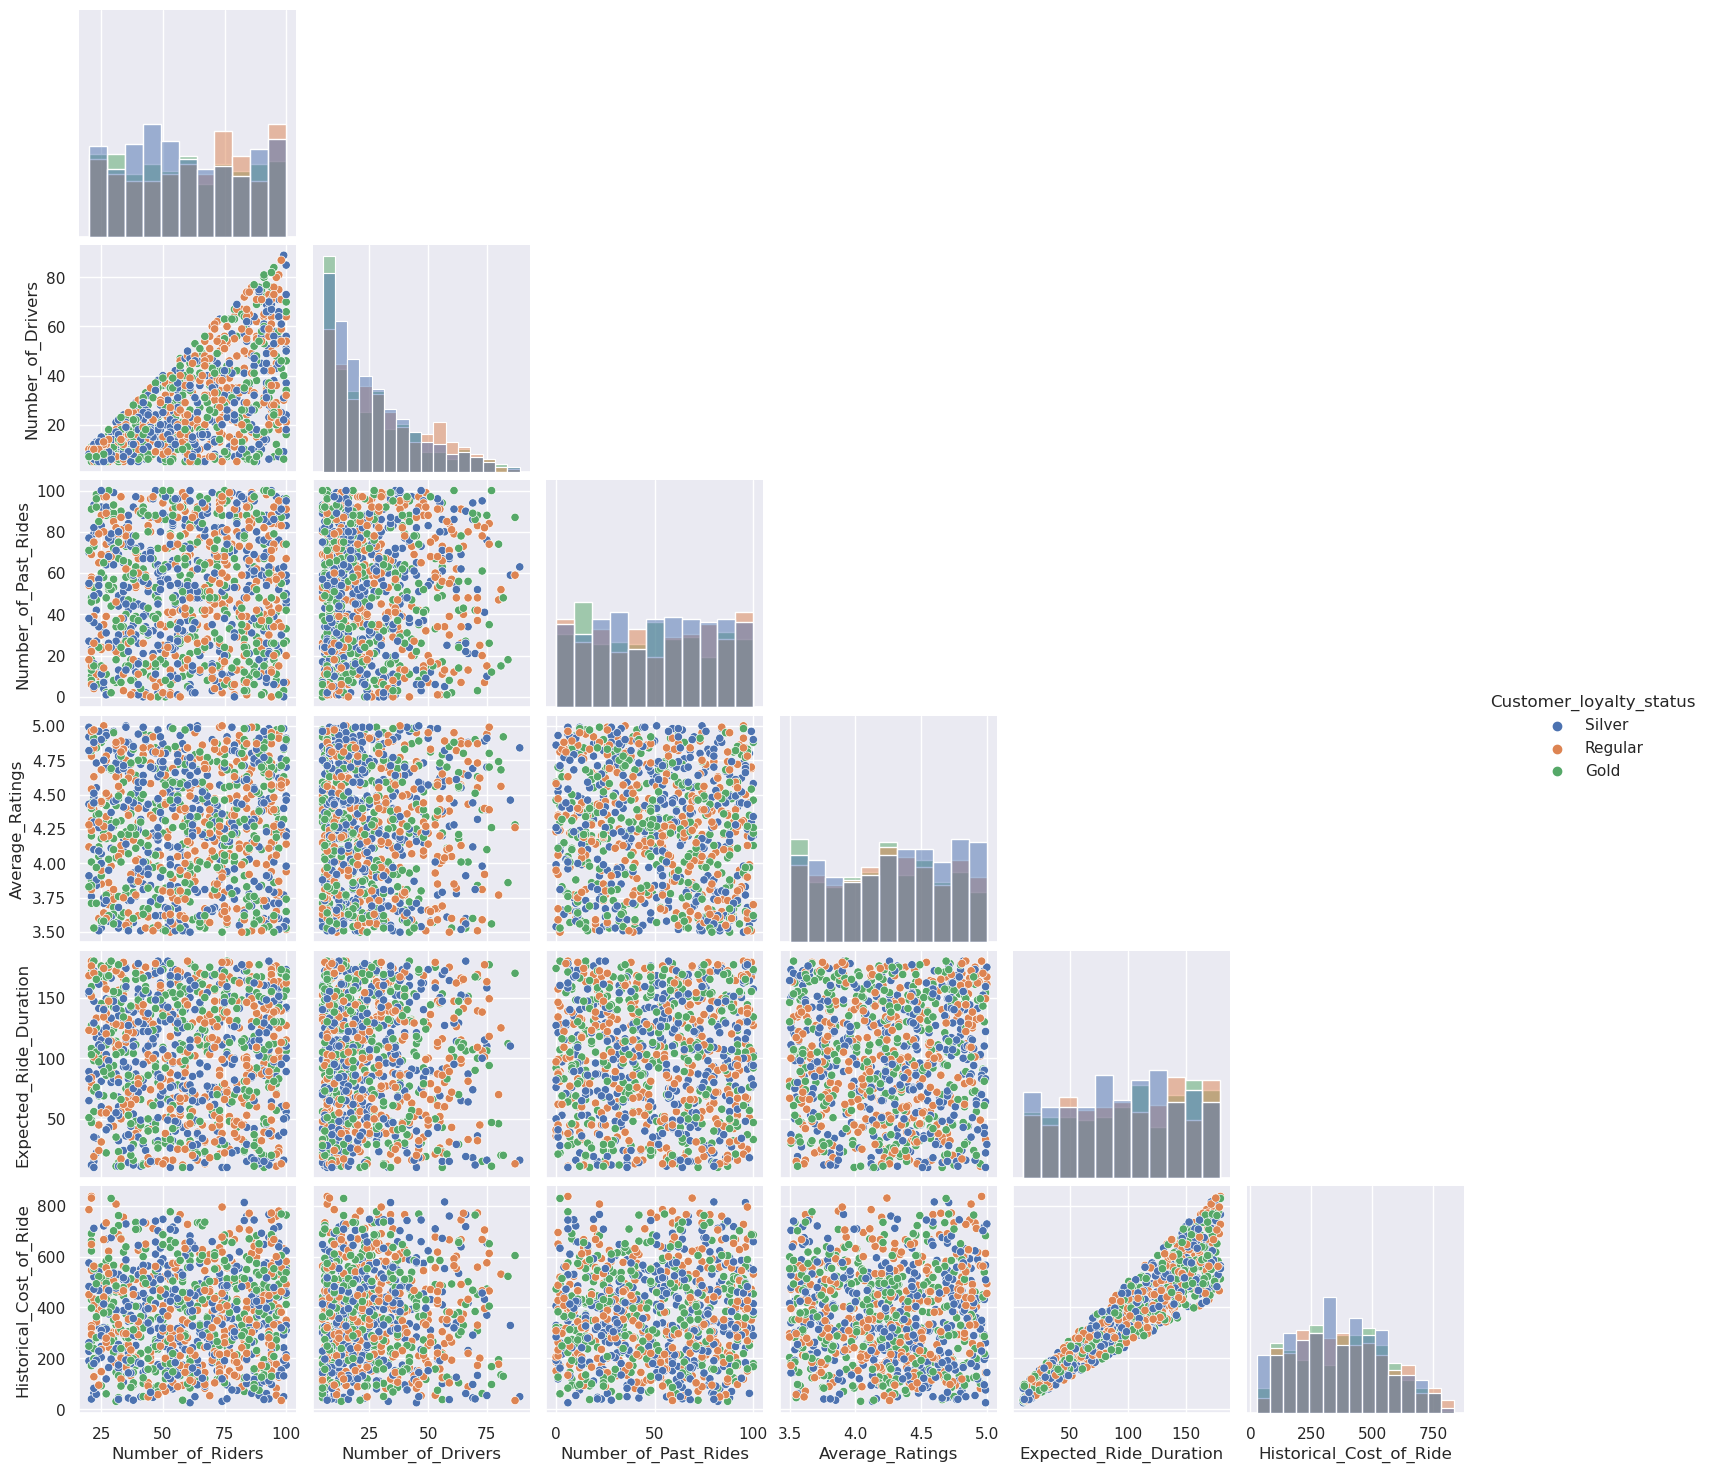

In [22]:
num = df.select_dtypes(include=[int, float])
num['Customer_loyalty_status'] = df['Customer_Loyalty_Status']
sns.pairplot(num, hue='Customer_loyalty_status', diag_kind='hist', corner=True)
plt.show()

For most of pairs there is no correlation, some relation can be seen between no of riders and no of drivers and between historical cost and ride duration, which is kind of logical. There is no big difference in presence of different customers, regular, silver and gold customers use the service in similar volume. 

In [15]:
df['Location_Category'].value_counts()

Urban       346
Rural       332
Suburban    322
Name: Location_Category, dtype: int64

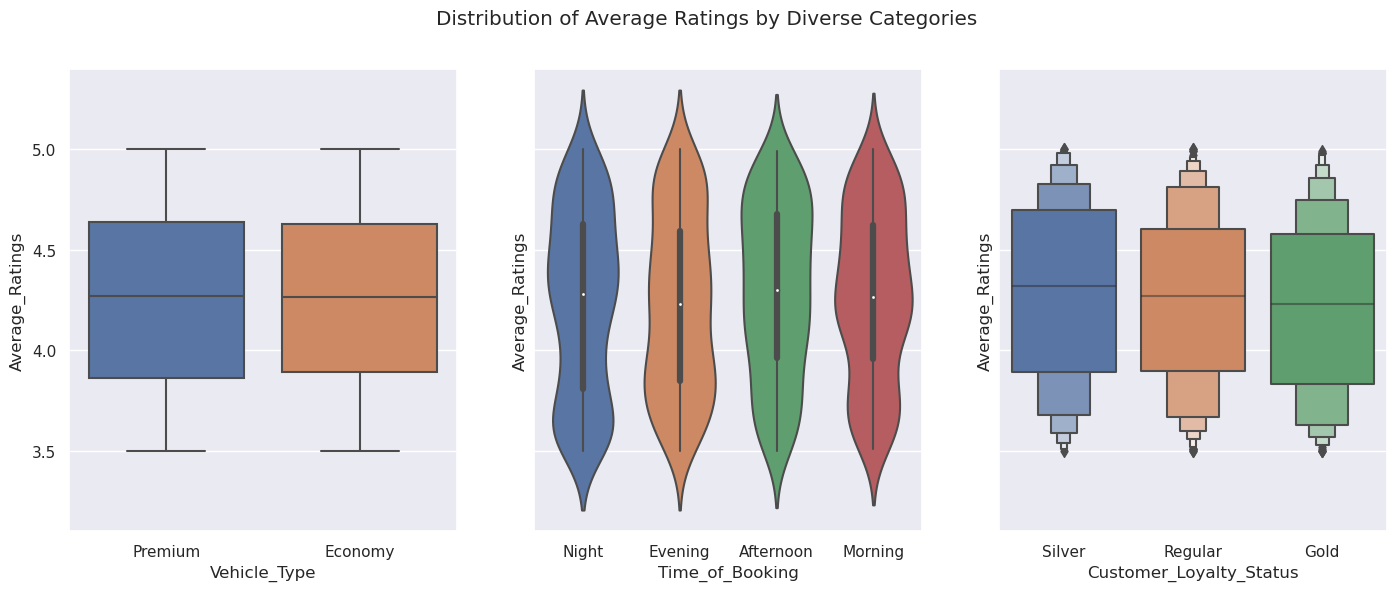

In [31]:
#who gives better ratings ? those who ride in urban suburban or rural areas 
fig, ax = plt.subplots(1, 3, figsize=(17, 6), sharey=True)
sns.boxplot(data = df, y='Average_Ratings', x='Vehicle_Type', ax=ax[0])
sns.violinplot(data=df, y='Average_Ratings', x='Time_of_Booking', ax=ax[1])
sns.boxenplot(data=df, y='Average_Ratings', x='Customer_Loyalty_Status', ax=ax[2])
fig.suptitle('Distribution of Average Ratings by Diverse Categories')
plt.show()


In [ ]:
#setting thresholds for high and low demand, via percentiles 25 and 75
#calculating profit for each ride 
#

In [ ]:
#building regressor model 